In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
linkdf=pd.read_csv(r"C:\Users\situ\Desktop\Data Scince\Personal_Projects\movie_data\links.csv")
moviesdf=pd.read_csv(r"C:\Users\situ\Desktop\Data Scince\Personal_Projects\movie_data\movies.csv")
ratingdf=pd.read_csv(r"C:\Users\situ\Desktop\Data Scince\Personal_Projects\movie_data\ratings.csv")
tagsdf=pd.read_csv(r"C:\Users\situ\Desktop\Data Scince\Personal_Projects\movie_data\tags.csv")

# Joining process of all table

In [3]:
linkdf

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
moviesdf

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
ratingdf

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
tagsdf

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [7]:
merged_df1 = pd.merge(linkdf, moviesdf, on='movieId')
merged_df2 = pd.merge(merged_df1, ratingdf, on='movieId')
df = pd.merge(merged_df2, tagsdf, on='movieId')

In [8]:
df

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...,...,...
233208,187595,3778644,348350.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


# What is the shape of "movies.csv"?
# What is the shape of "ratings.csv"?

In [9]:
print("Shape of link data is:-",linkdf.shape)
print("Shape of movies data is:-",moviesdf.shape)
print("Shape of ratings data is:-",ratingdf.shape)
print("Shape of tags data is:-",tagsdf.shape)

Shape of link data is:- (9742, 3)
Shape of movies data is:- (9742, 3)
Shape of ratings data is:- (100836, 4)
Shape of tags data is:- (3683, 4)


# How many unique "userId" are available in "ratings.csv"?

In [10]:
uni=ratingdf['userId'].unique()
len(uni)

610

# Which movie has recieved maximum number of user ratings?

In [11]:
#rating for each movie
each_rating=ratingdf['movieId'].value_counts()

#maximum rating movie
max_rating=each_rating.idxmax()

#movie name
movie_name=moviesdf[moviesdf['movieId']==max_rating]

print(f"The movie with the maximum number of user ratings is:")
print(movie_name['title'].tolist())

The movie with the maximum number of user ratings is:
['Forrest Gump (1994)']


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [12]:
# movie which is our target frist findits id
movie_name= "Matrix, The (1999)" 

In [13]:
# Find movieId form the movie title
movie_id = moviesdf[moviesdf['title'] == movie_name]['movieId'].iloc[0]

In [14]:
# find the tags for that movieId
movie_tags = tagsdf[tagsdf['movieId'] == movie_id]['tag'].tolist()

In [15]:
print(f"The correct tags submitted by users for '{movie_name}' are:")
print(movie_tags)

The correct tags submitted by users for 'Matrix, The (1999)' are:
['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [16]:
movie_name="Terminator 2: Judgment Day (1991)"

In [17]:
#merge data to find all the rating for that movie
rating_movies_df = pd.merge(ratingdf, moviesdf, on='movieId')

In [18]:
# merge data frame
rating_movies_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [19]:
#finding all movie ratings
movie_ratings = rating_movies_df[rating_movies_df['title'] == movie_name]['rating']

In [20]:
movie_ratings

26714    3.0
26715    3.0
26716    2.5
26717    4.0
26718    5.0
        ... 
26933    3.5
26934    4.0
26935    3.0
26936    3.0
26937    5.0
Name: rating, Length: 224, dtype: float64

In [21]:
# calculate avrage rating
average_rating = movie_ratings.mean()

In [22]:
print(f"The average user rating for '{movie_name}' is: {average_rating}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.970982142857143


# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [23]:
movie_name="Fight Club (1999)"

In [24]:
movie_ratings = rating_movies_df[rating_movies_df['title'] == movie_name]['rating']

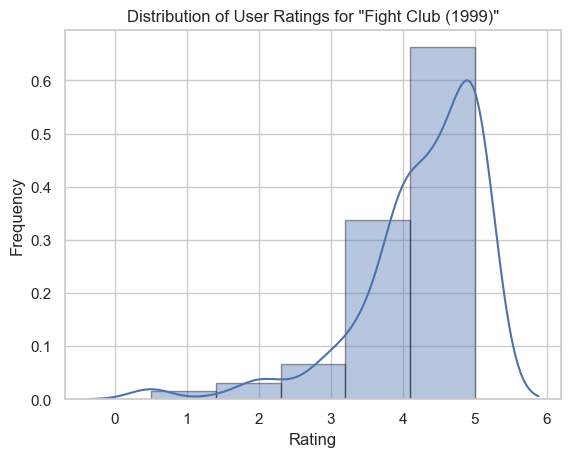

In [25]:
sns.set(style="whitegrid")
sns.distplot(movie_ratings, kde=True, bins=5, hist_kws={"edgecolor": "black"})
plt.title(f'Distribution of User Ratings for "{movie_name}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 🟢 IMPORTANT NOTE 1 🟢
- Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any  of the following questions.

- Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

- Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

# Step-1

In [26]:
grouped_ratings = ratingdf.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Step-2

In [27]:
grouped_merge_df = pd.merge(moviesdf, grouped_ratings, on='movieId', how='inner')

# Step-3

In [28]:
filtered_df = grouped_merge_df[grouped_merge_df['rating_count'] > 50]

In [29]:
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


# Which movie is the most popular based on  average user ratings?


In [30]:
most_popular_movie = filtered_df[filtered_df['rating_mean'] == filtered_df['rating_mean'].max()]

In [31]:
print(f"The most popular movie based on average user ratings is:")
print(most_popular_movie[['title', 'rating_mean']])

The most popular movie based on average user ratings is:
                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [32]:
sorted_df = filtered_df.sort_values(by='rating_count', ascending=False)

In [33]:
top5_popular_movies = sorted_df.head(5)
top5_popular_movies

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [34]:
print(f"The top 5 popular movies based on the number of user ratings are:")
print(top5_popular_movies[['title', 'rating_count']])

The top 5 popular movies based on the number of user ratings are:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [35]:
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [36]:
filtered_df['genres'] = filtered_df['genres'].apply(lambda x: x.split("|"))

In [37]:
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615
5,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078
6,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846
8358,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151
8457,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847


In [38]:
sci_fi_df = filtered_df[filtered_df['genres'].apply(lambda x: 'Sci-Fi' in x)]

In [39]:
sorted_sci_fi_df = sci_fi_df.sort_values(by='rating_count', ascending=False)

In [40]:
sorted_sci_fi_df

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)","[Action, Sci-Fi, Thriller]",278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",251,4.231076
418,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi, Thriller]",238,3.750000
507,589,Terminator 2: Judgment Day (1991),"[Action, Sci-Fi]",224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),"[Action, Adventure, Comedy, Sci-Fi]",54,3.833333
144,172,Johnny Mnemonic (1995),"[Action, Sci-Fi, Thriller]",53,2.679245
2028,2701,Wild Wild West (1999),"[Action, Comedy, Sci-Fi, Western]",53,2.207547
559,673,Space Jam (1996),"[Adventure, Animation, Children, Comedy, Fanta...",53,2.707547


In [41]:
# Select the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_df.iloc[2]

print(f"The third most popular Sci-Fi movie based on the number of user ratings is:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])

The third most popular Sci-Fi movie based on the number of user ratings is:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


# 🟢 IMPORTANT NOTE 2 🟢
- You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

- Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [42]:
moviesdf

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [43]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'data-testid': 'ratingValue'})
    return {'imdb_id': imdbId, 'rating': imdb_rating.text if imdb_rating else np.nan}

In [45]:
# Apply the scrapper function to each row of the DataFrame
filtered_df['imdb_data'] = filtered_df['movieId'].apply(scrapper)

In [48]:
filtered_df

,movieId,title,genres,rating_count,rating_mean,imdb_data
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930,"{'imdb_id': 1, 'rating': nan}"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818,"{'imdb_id': 2, 'rating': nan}"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615,"{'imdb_id': 3, 'rating': nan}"
5,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078,"{'imdb_id': 6, 'rating': nan}"
6,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185,"{'imdb_id': 7, 'rating': nan}"
...,...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667,"{'imdb_id': 106782, 'rating': nan}"
8354,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846,"{'imdb_id': 109374, 'rating': nan}"
8358,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,"{'imdb_id': 109487, 'rating': nan}"
8457,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847,"{'imdb_id': 112852, 'rating': nan}"


In [50]:
highest_rated_movie = filtered_df.loc[filtered_df['imdb_data'].apply(lambda x: float(x['rating']) if pd.notna(x['rating']) else 0).idxmax()]

In [51]:
highest_rated_movie

movieId                                                         1
title                                            Toy Story (1995)
genres          [Adventure, Animation, Children, Comedy, Fantasy]
rating_count                                                  215
rating_mean                                               3.92093
imdb_data                           {'imdb_id': 1, 'rating': nan}
Name: 0, dtype: object

In [56]:
print("Movie with the highest IMDb rating:")
print(highest_rated_movie[['movieId','title', 'imdb_data']])

Movie with the highest IMDb rating:
movieId                                  1
title                     Toy Story (1995)
imdb_data    {'imdb_id': 1, 'rating': nan}
Name: 0, dtype: object


# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating?


In [53]:
sci_fi_df = filtered_df[filtered_df['genres'].apply(lambda x: 'Sci-Fi' in x)]

In [54]:
# Find the Sci-Fi movie with the highest IMDb rating
highest_rated_sci_fi_movie = sci_fi_df.loc[sci_fi_df['imdb_data'].apply(lambda x: float(x['rating']) if pd.notna(x['rating']) else 0).idxmax()]

In [55]:
print(f"The movieId of the Sci-Fi movie with the highest IMDb rating is: {highest_rated_sci_fi_movie['movieId']}")

The movieId of the Sci-Fi movie with the highest IMDb rating is: 32
